# Abdelkarim Bisharat

Individual Project

In [232]:
import numpy as np
import pandas as pd 

In [233]:
evictions = pd.read_csv('Evictions.csv')

In [234]:
evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,51101/18,80697,86 MOTHER GASTON BLV D,3H,11/06/2019,Justin,Grossman,Residential,BROOKLYN,11233,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28044/17,110775,1772 EAST 172ND ST,5F,01/17/2018,Maxine,Chevlowe,Residential,BRONX,10472,Not an Ejectment,Possession,40.832769,-73.867842,9.0,18.0,76.0,2098742.0,2.037850e+09,West Farms-Bronx River
2,K68361/16,92930,903 DREW ST,207,05/19/2017,Darlene,Barone,Residential,BROOKLYN,11207,Not an Ejectment,Possession,40.666988,-73.860247,5.0,42.0,1220.0,3331658.0,3.045168e+09,East New York
3,N68844/18,111132,2070 ADAM CLAYTON POWELL BLVD A/K/A 2070 7TH AVE,7B,01/09/2019,Darlene,Barone,Residential,MANHATTAN,10027,Not an Ejectment,Possession,40.807961,-73.949077,10.0,9.0,222.0,1088475.0,1.019290e+09,Central Harlem South
4,52305/17,9929,132-70 SANFORD AVENUE,2A,05/23/2017,Edward,Guida,Residential,QUEENS,11355,Not an Ejectment,Possession,40.755485,-73.831279,7.0,20.0,849.0,4115061.0,4.051010e+09,Flushing


In [235]:
evictions.shape

(66402, 20)

In [236]:
evictions.dtypes

Court Index Number            object
Docket Number                  int64
Eviction Address              object
Eviction Apartment Number     object
Executed Date                 object
Marshal First Name            object
Marshal Last Name             object
Residential/Commercial        object
BOROUGH                       object
Eviction Postcode              int64
Ejectment                     object
Eviction/Legal Possession     object
Latitude                     float64
Longitude                    float64
Community Board              float64
Council District             float64
Census Tract                 float64
BIN                          float64
BBL                          float64
NTA                           object
dtype: object

In [237]:
evictions['Executed Date'].tail()

66397    04/05/2018
66398    03/09/2018
66399    02/23/2017
66400    05/12/2017
66401    11/18/2019
Name: Executed Date, dtype: object

In [238]:
evictions['Executed Date'] = pd.to_datetime(evictions['Executed Date'], dayfirst=True)
evictions.dtypes

Court Index Number                   object
Docket Number                         int64
Eviction Address                     object
Eviction Apartment Number            object
Executed Date                datetime64[ns]
Marshal First Name                   object
Marshal Last Name                    object
Residential/Commercial               object
BOROUGH                              object
Eviction Postcode                     int64
Ejectment                            object
Eviction/Legal Possession            object
Latitude                            float64
Longitude                           float64
Community Board                     float64
Council District                    float64
Census Tract                        float64
BIN                                 float64
BBL                                 float64
NTA                                  object
dtype: object

In [239]:
#evictions['Executed Date'].dt.year==2017
data2017 = evictions[evictions['Executed Date'].dt.year==2017]
print("Evictions in 2017:", len(data2017))

Evictions in 2017: 22530


In [240]:
data2018 = evictions[evictions['Executed Date'].dt.year==2018]
print("Evictions in 2018:", len(data2018))

Evictions in 2018: 21830


In [241]:
data2019 = evictions[evictions['Executed Date'].dt.year==2019]
print("Evictions in 2019:", len(data2019))

Evictions in 2019: 18647


In [242]:
data2020 = evictions[evictions['Executed Date'].dt.year==2020]
print("Evictions in 2020:", len(data2020))

Evictions in 2020: 3387


In [243]:
data2021 = evictions[evictions['Executed Date'].dt.year==2021]
print("Evictions in 2021:", len(data2021))

Evictions in 2021: 7


We have data from 2017 to the present. 2017 was the year with the most evictions and 2021 was the one with the least. Since 2021 isn't finished yet, we could say 2020 had the least. There is a steady decline in evictions from 2017 to 2019 and then drops dramatically from 2019 to 2020. To me this didn't come as a surprise because of the pandemic which allowed people more time during the hardship. I assumed it was going to be low for 2020 and 2021 but I did not think there would be a steady drop from 2017 to 2019. Upon research I found that NYC has taken steps to protect its tenants' rights including laws in 2017 and 2019. With this legislation it is clearly improving eviction rates indicated by the drops. 

Source:https://furmancenter.org/

In [244]:
evictions['Residential/Commercial'].value_counts()

Residential    60809
Commercial      5593
Name: Residential/Commercial, dtype: int64

In [245]:
def ratioCalc(df):
    residentialCount = 0
    commercialCount = 0
    for i in range(len(df)):
        if df['Residential/Commercial'].iloc[i] == 'Residential':
            residentialCount += 1
        elif df['Residential/Commercial'].iloc[i] == 'Commercial':
            commercialCount += 1
            
    ctrRatio = commercialCount / residentialCount
    return ctrRatio

In [246]:
print(ratioCalc(evictions))

0.09197651663405088


In [247]:
print(ratioCalc(data2017))

0.0826525708793849


In [248]:
print(ratioCalc(data2018))

0.09215529317590554


In [249]:
print(ratioCalc(data2019))

0.09849779086892489


In [250]:
print(ratioCalc(data2020))

0.11598023064250412


In [251]:
print(ratioCalc(data2021))

ZeroDivisionError: division by zero

Based on the data, there were no residential evictions in 2021 hence the division by zero error. The highest ratio of commercial to residential evictions happened in 2020 which I presume is because of the pandemic with businesses being forced to shut down. 

Top 5 Marshals

In [252]:
evictions[['Marshal First Name', 'Marshal Last Name']].value_counts().head()

Marshal First Name  Marshal Last Name
Justin              Grossman             9173
Henry               Daley                6487
Ileana              Rivera               5842
Thomas              Bia                  5560
Edward              Guida                5422
dtype: int64

In [253]:
evictions['BOROUGH'].value_counts()

BRONX            22053
BROOKLYN         18832
QUEENS           13177
MANHATTAN        10167
STATEN ISLAND     2173
Name: BOROUGH, dtype: int64

In [254]:
data2017['BOROUGH'].value_counts()

BRONX            7662
BROOKLYN         6357
QUEENS           4325
MANHATTAN        3452
STATEN ISLAND     734
Name: BOROUGH, dtype: int64

In [255]:
data2018['BOROUGH'].value_counts()

BRONX            7140
BROOKLYN         6157
QUEENS           4452
MANHATTAN        3390
STATEN ISLAND     691
Name: BOROUGH, dtype: int64

In [256]:
data2019['BOROUGH'].value_counts()

BRONX            6188
BROOKLYN         5312
QUEENS           3705
MANHATTAN        2806
STATEN ISLAND     636
Name: BOROUGH, dtype: int64

In [257]:
data2020['BOROUGH'].value_counts()

BRONX            1061
BROOKLYN         1003
QUEENS            693
MANHATTAN         518
STATEN ISLAND     112
Name: BOROUGH, dtype: int64

In [258]:
data2021['BOROUGH'].value_counts()

BROOKLYN     3
QUEENS       2
MANHATTAN    1
BRONX        1
Name: BOROUGH, dtype: int64

Throughout the years, all 5 boroughs noticed declines in evictions except for one singularity from 2017 to 2018 with Queens having a small increase. Excluding 2021 because of completion, the rank remains the same with the order being Bronx, Brooklyn, Queens, Manhattan, and then Staten Island. 

In [259]:
#population by year for each borough: [bronx, brooklyn, queens, manhattan, statenisland]
#data taken from datacommons.org Note that these are estimates

pop2017 = [1456000, 2635000, 2339000, 1654000, 475948]
pop2018 = [1438000, 2601000, 2299000, 1632000, 474101]
pop2019 = [1435000, 2590000, 2287000, 1632000, 474893]
pop2020 = [1390450, 2600000, 2212000, 1631000, 475000]

In [260]:
listPop = [pop2017, pop2018, pop2019, pop2020]
boroughNames = ["Bronx", "Brooklyn", "Queens", "Manhattan", "Staten Island"]
years = ["2017", "2018", "2019", "2020"]

for i in range(len(listPop)):
    print("Percent evictions of population by borough in", years[i])
    for j in range(5):
        print(boroughNames[j], (data2017['BOROUGH'].value_counts()[j]/listPop[i][j])*100)
    print("\n")

Percent evictions of population by borough in 2017
Bronx 0.5262362637362638
Brooklyn 0.24125237191650853
Queens 0.18490808037622916
Manhattan 0.2087061668681983
Staten Island 0.15421852807449551


Percent evictions of population by borough in 2018
Bronx 0.5328233657858136
Brooklyn 0.2444059976931949
Queens 0.18812527185732927
Manhattan 0.21151960784313728
Staten Island 0.15481933174576726


Percent evictions of population by borough in 2019
Bronx 0.5339372822299652
Brooklyn 0.24544401544401542
Queens 0.18911237428946218
Manhattan 0.21151960784313728
Staten Island 0.15456113271831762


Percent evictions of population by borough in 2020
Bronx 0.5510446258405551
Brooklyn 0.24450000000000002
Queens 0.1955244122965642
Manhattan 0.2116492949110975
Staten Island 0.15452631578947368




Clear very little change in each borough in every year

In [273]:
#'NTA map'
#'nynta.csv'

import matplotlib 
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon

In [274]:
#https://data.cityofnewyork.us/City-Government/NTA-map/d3qk-pfyz

nynta = gpd.read_file('NTA map')

In [275]:
len(nynta)

195

In [276]:
nynta.head()

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626..."
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700..."
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861..."
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651..."


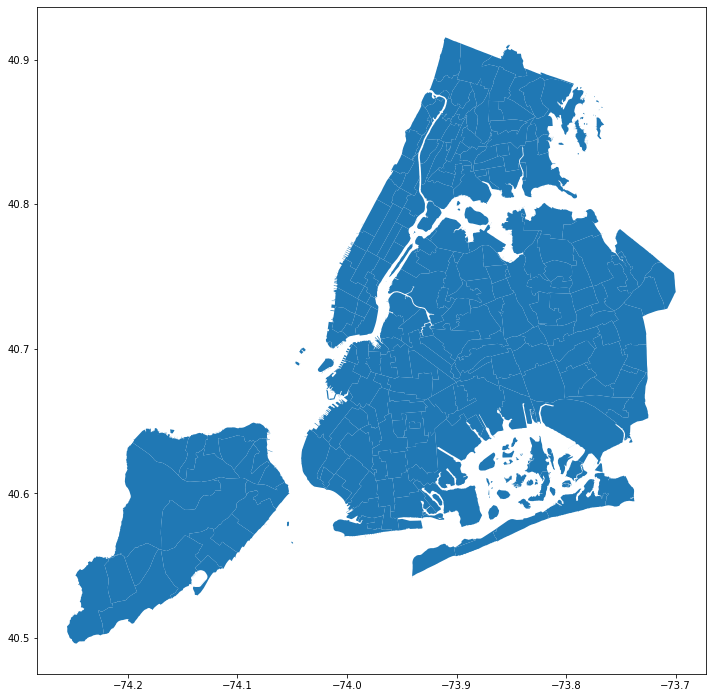

In [277]:
ax = nynta.plot(legend=False,figsize=(12, 20), alpha = 2,markersize=5)

In [272]:
#nynta['NTA'] = nynta['ntaname']
#nynta = nynta.merge(evictions, on='NTA')
#nynta.head()

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry,NTA,Court Index Number,...,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626...",Midwood,96426/17,...,11230,Not an Ejectment,Possession,40.616648,-73.954695,14.0,48.0,538.0,3181129.0,3.067480e+09
1,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626...",Midwood,57263/17,...,11230,Not an Ejectment,Possession,40.611987,-73.953787,14.0,48.0,546.0,3182096.0,3.067670e+09
2,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626...",Midwood,61716/17,...,11230,Not an Ejectment,Possession,40.614702,-73.963254,14.0,48.0,542.0,3181198.0,3.067490e+09
3,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626...",Midwood,84669/16A,...,11230,Not an Ejectment,Possession,40.622725,-73.961621,14.0,44.0,534.0,3179980.0,3.067160e+09
4,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626...",Midwood,K087991/18,...,11230,Not an Ejectment,Possession,40.629566,-73.965814,14.0,45.0,530.0,3179167.0,3.066950e+09


In [279]:
lst1 = []
lst2 = []
for i in range(len(nynta.ntaname)):
    lst1.append(nynta.ntaname.iloc[i])
    lst2.append(len(evictions[(evictions['NTA'] == lst1[i])]))

In [280]:
tuples = list(zip(lst1,lst2))
ntaEvictions = pd.DataFrame(tuples, columns=['NTA','Evictions'])
ntaEvictions.head()

,NTA,Evictions
0,Midwood,231
1,Bedford,487
2,Fordham South,621
3,Borough Park,181
4,Rugby-Remsen Village,801


In [281]:
nynta['NTA'] = nynta['ntaname']
nynta = nynta.merge(ntaEvictions, on='NTA')
nynta.head()

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry,NTA,Evictions
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626...",Midwood,231
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700...",Bedford,487
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861...",Fordham South,621
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",Borough Park,181
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651...",Rugby-Remsen Village,801


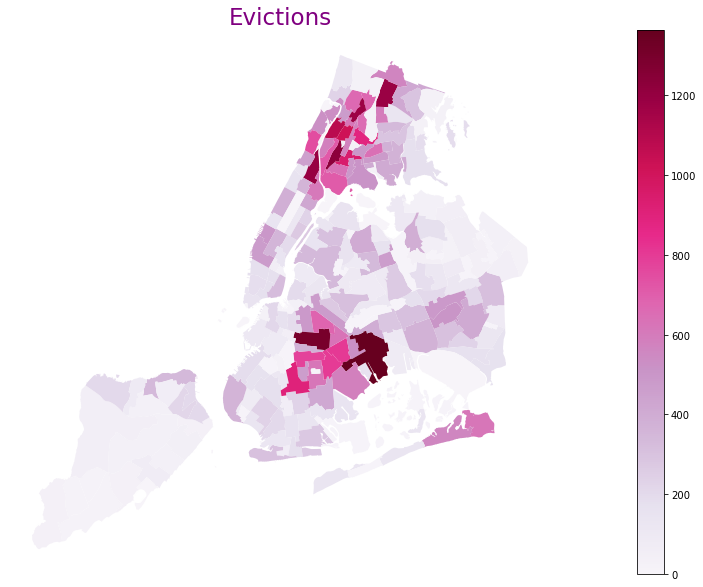

In [286]:
nynta.plot(column='Evictions', legend = True, figsize=(30, 10),cmap='PuRd')
plt.axis('off')
plt.title('Evictions', fontsize=23, color ='purple')
plt.show()

With this visualization, it is clear to see the large concentrations in parts of Brooklyn, the Bronx and Manhattan as well. 

In [297]:
#https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Neighborhood-Tabulatio/swpk-hqdp

nycPopulation = pd.read_csv('nycPopulation.csv')
nycPopulation.tail()

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
385,Staten Island,2010,85,SI37,Stapleton-Rosebank,26453
386,Staten Island,2010,85,SI45,New Dorp-Midland Beach,21896
387,Staten Island,2010,85,SI48,Arden Heights,25238
388,Staten Island,2010,85,SI54,Great Kills,40720
389,Staten Island,2010,85,SI99,park-cemetery-etc-Staten Island,0


In [299]:
nycPop = nycPopulation[nycPopulation['Year']==2010]
nycPop.head()

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078
196,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517
197,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415
198,Bronx,2010,5,BX06,Belmont,27378
199,Bronx,2010,5,BX07,Bronxdale,35538


In [302]:
nycPop['NTA'] = nycPop['NTA Name']

<ipython-input-302-9890a3518207>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nycPop['NTA'] = nycPop['NTA Name']


In [303]:
nynta = nynta.merge(nycPop, on='NTA')
nynta.head()

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry,NTA,Evictions,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626...",Midwood,231,Brooklyn,2010,47,BK43,Midwood,52835
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700...",Bedford,487,Brooklyn,2010,47,BK75,Bedford,70713
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861...",Fordham South,621,Bronx,2010,5,BX40,Fordham South,28262
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",Borough Park,181,Brooklyn,2010,47,BK88,Borough Park,106357
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651...",Rugby-Remsen Village,801,Brooklyn,2010,47,BK96,Rugby-Remsen Village,55326


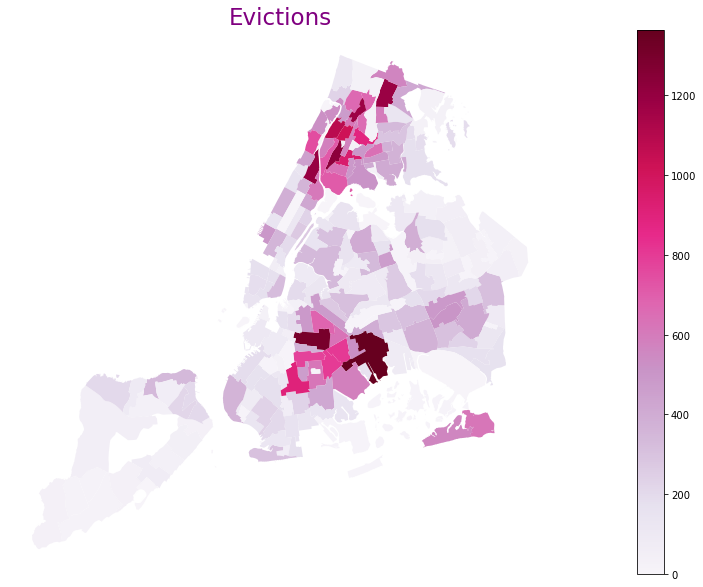

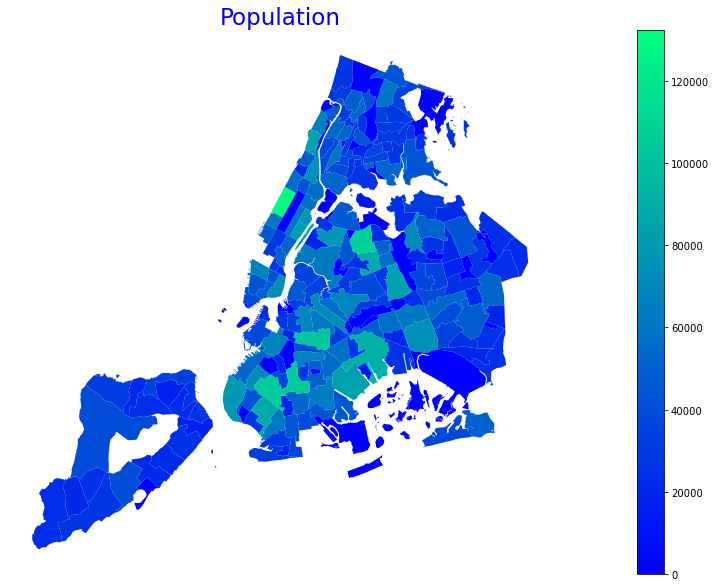

In [315]:
nynta.plot(column='Evictions', legend = True, figsize=(30, 10),cmap='PuRd')
plt.axis('off')
plt.title('Evictions', fontsize=23, color ='purple')
plt.show()

nynta.plot(column='Population', legend = True, figsize=(30, 10),cmap='winter')
plt.axis('off')
plt.title('Population', fontsize=23, color ='blue')
plt.show()

I decided to visualize population data because I was unable to find income data that I could use. What stuck out to me was Brooklyn's high population and high evictions. It seems like there is a correlation with highly dense areas and evictions but then the Bronx says otherwise. It would be better to visualize household income and compare with evictions since inability to pay rent is the main reason for eviction. 